# Plotting Settings:

In [1]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio   ### Allows you to save plotly figs

import os
import pandas as pd
import datetime
import numpy as np


config = dict({
                'displayModeBar': False,
                'responsive': False,
                'staticPlot': True,
                'displaylogo': False,
                'showTips': False,
                })


def get_color(colorscale_name, loc):
    from _plotly_utils.basevalidators import ColorscaleValidator
    # first parameter: Name of the property being validated
    # second parameter: a string, doesn't really matter in our use case
    cv = ColorscaleValidator("colorscale", "")
    # colorscale will be a list of lists: [[loc1, "rgb1"], [loc2, "rgb2"], ...] 
    colorscale = cv.validate_coerce(colorscale_name)
    
    if hasattr(loc, "__iter__"):
        return [get_continuous_color(colorscale, x) for x in loc]
    return get_continuous_color(colorscale, loc)
        

# Identical to Adam's answer
import plotly.colors
from PIL import ImageColor
def get_continuous_color(colorscale, intermed):
    """
    Plotly continuous colorscales assign colors to the range [0, 1]. This function computes the intermediate
    color for any value in that range.

    Plotly doesn't make the colorscales directly accessible in a common format.
    Some are ready to use:
    
        colorscale = plotly.colors.PLOTLY_SCALES["Greens"]

    Others are just swatches that need to be constructed into a colorscale:

        viridis_colors, scale = plotly.colors.convert_colors_to_same_type(plotly.colors.sequential.Viridis)
        colorscale = plotly.colors.make_colorscale(viridis_colors, scale=scale)

    :param colorscale: A plotly continuous colorscale defined with RGB string colors.
    :param intermed: value in the range [0, 1]
    :return: color in rgb string format
    :rtype: str
    """
    if len(colorscale) < 1:
        raise ValueError("colorscale must have at least one color")

    hex_to_rgb = lambda c: "rgb" + str(ImageColor.getcolor(c, "RGB"))

    if intermed <= 0 or len(colorscale) == 1:
        c = colorscale[0][1]
        return c if c[0] != "#" else hex_to_rgb(c)
    if intermed >= 1:
        c = colorscale[-1][1]
        return c if c[0] != "#" else hex_to_rgb(c)

    for cutoff, color in colorscale:
        if intermed > cutoff:
            low_cutoff, low_color = cutoff, color
        else:
            high_cutoff, high_color = cutoff, color
            break

    if (low_color[0] == "#") or (high_color[0] == "#"):
        # some color scale names (such as cividis) returns:
        # [[loc1, "hex1"], [loc2, "hex2"], ...]
        low_color = hex_to_rgb(low_color)
        high_color = hex_to_rgb(high_color)

    return plotly.colors.find_intermediate_color(
        lowcolor=low_color,
        highcolor=high_color,
        intermed=((intermed - low_cutoff) / (high_cutoff - low_cutoff)),
        colortype="rgb",
    )




cols = get_color("Viridis", np.linspace(0, 1, 5))
map_cols = np.linspace(0, 1, 5)
colorscale=[]
for i,val in enumerate(map_cols):
    colorscale.append([val, cols[i]])
    



# Simplify Plotting Schemes:
col1 =  px.colors.qualitative.Plotly[2]
col2 =  px.colors.qualitative.Plotly[4]
col3 =  px.colors.qualitative.Plotly[1]
col4 =  px.colors.qualitative.Plotly[3]
col5 =  px.colors.qualitative.Plotly[4]
col6 =  px.colors.qualitative.Plotly[5]



# Load GPI Data


In [39]:
from netCDF4 import Dataset
def read_nc_file( filename, variables):
    ''' This function reads the TIEGCM .nc files and saves the given input variables to a dictionary.
        The breakloop feature is here so that if the file doesn't exist the code can still continue.  '''
    status = os.path.exists(filename)
    
    if status == True:
        data = {}
        for i, var_names in enumerate(variables):
            ncid =  Dataset(filename,"r+", format="NETCDF4")# filename must be a string
            varData = ncid.variables
            data[var_names] = np.array(varData[var_names])  
    elif status == False:
        print('No File Found', filename )
        breakloop = True
        data = 0
        return( data , breakloop)
    breakloop = False
    return(data,breakloop )


arc_list = []

arc_list_18 = np.arange(292,366)
for i in arc_list_18:
    val = '2018'+str(i)
    arc_list.append(int(val))
    
    #     print(val)
    
arc_list_19 = np.arange(1,10)
for i in arc_list_19:
    val = '201900'+str(i)
    arc_list.append(int(val))


path_to_f107 = '/data/data_geodyn/gpi_1960001-2021243_f107aDaily.nc'
variables = ['year_day', 'f107d', 'f107a', 'kp']
f107_data = read_nc_file(path_to_f107, variables)

date        = []
kp_list     = []
f107d_list  = []
f107a_list  = []
date_3hr    = []
doy_list    = []


for i,val in enumerate(arc_list):
    
    index = f107_data[0]['year_day']==val
    kp_list.append(f107_data[0]['kp'][index][0])
    f107d_list.append(f107_data[0]['f107d'][index][0])
    f107a_list.append(f107_data[0]['f107a'][index][0])
    doy_list.append(str(f107_data[0]['year_day'][index][0])[-3:])
    
    date.append(pd.to_datetime( str(val), format='%Y%j'))

    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=0))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=3))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=6))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=9))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=12))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=15))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=18))
    date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=21))
#     date_3hr.append(pd.to_datetime( str(val), format='%Y%j') +pd.Timedelta(hours=24))
    
kp_expand = []
for i in kp_list:
    for ii in i:
        kp_expand.append(ii)
        
        
        
solar_fluxes = {}
solar_fluxes['f107d_list'] = f107d_list
solar_fluxes['f107a_list'] = f107a_list
solar_fluxes['date']       = date
solar_fluxes['date_3hr']   = date_3hr
solar_fluxes['kp_expand']  = kp_expand
solar_fluxes['doy_list']  = doy_list



f107d_earth = []
f107a_earth = []
######################################################################### 
##### Account for the F10.7 at earth (instead of referenced at 1AU) #####
######################################################################### 

for i_doy,val_doy in enumerate(doy_list):
    iday = int(val_doy)
    theta0 = 2 * np.pi * (iday)/365.
    sfeps = 1.000110 + 0.034221*np.cos(theta0)+0.001280* np.sin(theta0) +0.000719*np.cos(2.*theta0)+0.000077*np.sin(2.*theta0)

    f107d_earth.append(sfeps * solar_fluxes['f107d_list'][i_doy])
    f107a_earth.append(sfeps * solar_fluxes['f107a_list'][i_doy])

solar_fluxes['f107d_earth'] = f107d_earth
solar_fluxes['f107a_earth'] = f107a_earth



In [28]:
# doy_list

In [78]:
fig = make_subplots(rows=1, cols=1,
                  #
                    vertical_spacing = 0.05,
                    shared_xaxes=True)


fig.add_trace(go.Scatter(  x=solar_fluxes['date'],
                           y=solar_fluxes['f107d_list'],
                           name = 'f107d',
#                            xaxis="x1",
                              mode='lines',
                              opacity=1,
                              line = dict(shape = 'hv', color = 'cornflowerblue', width=2),
                              showlegend=True),
                           secondary_y=False,
                           row=1, col=1,
                           )
fig.add_trace(go.Scatter(x=solar_fluxes['date'],
                           y=solar_fluxes['f107a_list'],
                           name = 'f107a',
#                          xaxis="x1",
                           mode='lines',
                           opacity=1,
                               line = dict(shape = 'hv', color = 'blue', width=2),
                           showlegend=True),
                           secondary_y=False,row=1, col=1)

fig.add_trace(go.Scatter(x=solar_fluxes['date'],
                           y=solar_fluxes['f107d_earth'],
                            name = 'f107d @earth',
#                           xaxis="x1",
                           mode='lines',
                           opacity=1,
                               line = dict(shape = 'hv', color = 'red', width=2),
                           showlegend=True),
                           secondary_y=False,row=1, col=1)

fig.add_trace(go.Scatter(x=solar_fluxes['doy_list'],
                           y=solar_fluxes['f107a_earth'],
                           name = 'f107a @earth',
                          xaxis="x2",
                           mode='lines',
                           opacity=1,
                               line = dict(shape = 'hv', color = 'red', width=2),
                           showlegend=True),
                           secondary_y=False,row=1, col=1)

# fig.add_trace(go.Scatter(x=solar_fluxes['date_3hr'],
#                            y=solar_fluxes['kp_expand'],
#                            name = 'Kp',
#                            mode='lines',
#                            opacity=1,
#                                line = dict(shape = 'hv', color = 'black', width=1),
#                            showlegend=True),
#                                secondary_y=False,row=2, col=1)


# fig.update_layout(
#     xaxis1=dict(range=[solar_fluxes['date'][0], solar_fluxes['date'][-1]]),
#     )
# fig.data[0].update(xaxis='x1')
fig.data[3].update(xaxis='x2')

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x2', 'side': 'top'});
# fig.update_layout(xaxis1= {'anchor': 'y', 'overlaying': 'x1', 'side': 'bottom'});



fig.update_layout(title_text='Double X Axis Example',
#                   legend=dict(yanchor='top', y=0.875, xanchor='right', x=1),
                  xaxis =dict(position = 0, title='Date',  
                              tickmode='array',  range=[solar_fluxes['date'][0], solar_fluxes['date'][-1]]),
                  
                  xaxis2=dict(position = 0, title='DOY', anchor='y', overlaying='x', side='top', tickmode='array', 
                                 ) 
                 )


fig.show(config=dict({
                'displayModeBar': True,
                'responsive': False,
                'staticPlot': False,
                'displaylogo': False,
                'showTips': False,
                }))


In [11]:
# solar_fluxes_shaded = {}
# solar_fluxes_shaded['f107d_list'] = f107d_list
# solar_fluxes_shaded['f107a_list'] = f107a_list
# solar_fluxes_shaded['date']       = date
# solar_fluxes_shaded['date_3hr']   = date_3hr
# solar_fluxes_shaded['kp_expand']  = kp_expand


### Prepare RMS total Plot arrays
arc_list={}
arc_list['1']=  ['2018.292', '2018.293', '2018.294', '2018.295', '2018.296', 
                 '2018.297', '2018.298', '2018.299' ]                  
                #
arc_list['2']=  ['2018.304', '2018.305', '2018.306', '2018.307', '2018.308' ]  
                #
arc_list['3']=  ['2018.313', '2018.314', '2018.315', '2018.316', '2018.317',
                 '2018.318', '2018.319', '2018.320', '2018.321', '2018.322',
                 '2018.323', '2018.324', '2018.325', '2018.326', '2018.327' ]  
                #
arc_list['4']=  ['2018.335', '2018.336', '2018.337' ]  
                #
arc_list['5']=  ['2018.349', '2018.350', '2018.351', '2018.352' ]  
                #
arc_list['6']=  ['2018.356', '2018.357', '2018.358' ]  
                #
arc_list['7']=  ['2018.365', '2019.001', '2019.002', '2019.003', '2019.004', 
                '2019.005', '2019.006', '2019.007', '2019.008',
                '2019.009' ]  



# for arclist in arc_listlist:
#     for arc in arclist:
#         print(pd.to_datetime( str(arc), format='%Y.%j'))
shadezone_i = {} 
shadezone_f = {}
shadezone_i['1'] = '2018.299'
shadezone_f['1'] = '2018.304'
shadezone_i['2'] = '2018.308'
shadezone_f['2'] = '2018.313'
shadezone_i['3'] = '2018.327'
shadezone_f['3'] = '2018.335'
shadezone_i['4'] = '2018.337'
shadezone_f['4'] = '2018.349'
shadezone_i['5'] = '2018.352'
shadezone_f['5'] = '2018.356'
shadezone_i['6'] = '2018.358'
shadezone_f['6'] = '2018.365'

SF = {}
for iii in np.arange(1,8):
#     print(iii)
    SF[str(iii)+'_shade_f107d'] = []
    SF[str(iii)+'_shade_date']  = []
    SF[str(iii)+'_f107d']       = []
    SF[str(iii)+'_date']        = []
    #     
    SF[str(iii)+'_shade_date_3hr'] = []
    SF[str(iii)+'_shade_kp_expand']  = []
    SF[str(iii)+'_date_3hr']       = []
    SF[str(iii)+'_kp_expand']        = []
    #  
    #     
    SF[str(iii)+'_f107d_earth']        = []
    SF[str(iii)+'_f107a_earth']        = []
    SF[str(iii)+'_shade_f107d_earth']        = []
    SF[str(iii)+'_shade_f107a_earth']        = []
#     solar_fluxes['f107d_earth'] = f107d_earth
#     solar_fluxes['f107a_earth'] = f107a_earth

    
    
    
#     shadezone_i[str(iii)] = 
#     shadezone_f[str(iii)] = 
    
    
    
for i, val in enumerate(solar_fluxes['date']):
    for iii in np.arange(1,8):

        if iii == 7:
            pass
        else:
            if val >= pd.to_datetime(shadezone_i[str(iii)], format='%Y.%j') and val <= pd.to_datetime(shadezone_f[str(iii)], format='%Y.%j'):    
                SF[str(iii)+'_shade_f107d'].append(solar_fluxes['f107d_list'][i])
                SF[str(iii)+'_shade_f107d_earth'].append(solar_fluxes['f107d_earth'][i])
                SF[str(iii)+'_shade_date'].append(val)

        if val >= pd.to_datetime(arc_list[str(iii)][0], format='%Y.%j') and val <= pd.to_datetime(arc_list[str(iii)][-1], format='%Y.%j'):    
            SF[str(iii)+'_f107d'].append(solar_fluxes['f107d_list'][i])
            SF[str(iii)+'_date'].append(val)

for i, val in enumerate(solar_fluxes['date_3hr']):
    for iii in np.arange(1,8):

        if iii == 7:
            pass
        else:
            if val >= pd.to_datetime(shadezone_i[str(iii)], format='%Y.%j') and val <= pd.to_datetime(shadezone_f[str(iii)], format='%Y.%j'):    
                SF[str(iii)+'_shade_date_3hr'].append(val)
                SF[str(iii)+'_shade_kp_expand'].append(solar_fluxes['kp_expand'][i])

        if val >= pd.to_datetime(arc_list[str(iii)][0], format='%Y.%j') and val <= pd.to_datetime(arc_list[str(iii)][-1], format='%Y.%j'):    
#             print(val)
            SF[str(iii)+'_date_3hr'].append(val)
            SF[str(iii)+'_kp_expand'].append(solar_fluxes['kp_expand'][i])



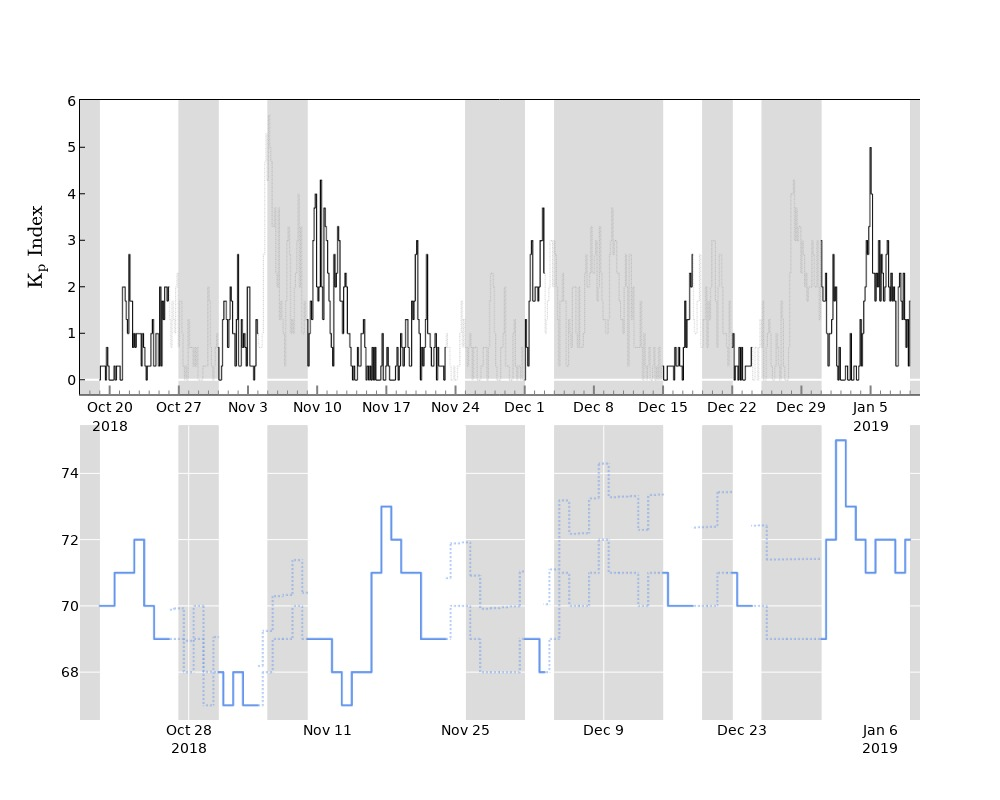

In [13]:
fig = make_subplots(rows=2, cols=1,
#                     subplot_titles=([ ' ', ]),
                    #                     
                    specs=[[ {"secondary_y": False} ],
                           [ {"secondary_y": False} ]],
                    #
                    vertical_spacing = 0.05,
                    shared_xaxes=True)
for iii in np.arange(1,8):
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_shade_date'],
                               y=SF[str(iii)+'_shade_f107d'],
                               mode='lines',
                               opacity=0.5,
    #                                        marker=dict(color='cornflowerblue',size=3),
                                   line = dict(dash='dot',shape = 'hvh', color = 'cornflowerblue', width=2),
                               showlegend=False),
                               secondary_y=False,row=2, col=1)
    
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_date'],
                               y=SF[str(iii)+'_f107d'],
                               mode='lines',
                               opacity=1,
                                   line = dict(shape = 'hvh', color = 'cornflowerblue', width=2),
                               showlegend=False),
                               secondary_y=False,row=2, col=1)
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_shade_date'],
                               y=SF[str(iii)+'_shade_f107d_earth'],
                               mode='lines',
                               opacity=0.5,
    #                                        marker=dict(color='cornflowerblue',size=3),
                                   line = dict(dash='dot',shape = 'hvh', color = 'cornflowerblue', width=2),
                               showlegend=False),
                               secondary_y=False,row=2, col=1)
    
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_date'],
                               y=SF[str(iii)+'_f107d_earth'],
                               mode='lines',
                               opacity=1,
                                   line = dict(shape = 'hvh', color = 'cornflowerblue', width=2),
                               showlegend=False),
                               secondary_y=False,row=2, col=1)
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_shade_date_3hr'],
                               y=SF[str(iii)+'_shade_kp_expand'],
                               mode='lines',
                               opacity=0.5,
    #                                        marker=dict(color='cornflowerblue',size=3),
                                   line = dict(dash='dot',shape = 'hvh', color = 'grey', width=1),
                               showlegend=False),
                               secondary_y=False,row=1, col=1)
    fig.add_trace(go.Scattergl(x=SF[str(iii)+'_date_3hr'],
                               y=SF[str(iii)+'_kp_expand'],
                               mode='lines',
                               opacity=1,
                                   line = dict(shape = 'hvh', color = 'black', width=1),
                               showlegend=False),
                               secondary_y=False,row=1, col=1)
    #### Background data gaps
    fig.add_vrect(x0=pd.to_datetime( str(2018290), format='%Y%j'),
              x1=pd.to_datetime( str(2018292), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018300), format='%Y%j'),
              x1=pd.to_datetime( str(2018304), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018309), format='%Y%j'),
              x1=pd.to_datetime( str(2018313), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018329), format='%Y%j'),
              x1=pd.to_datetime( str(2018335), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018338), format='%Y%j'),
              x1=pd.to_datetime( str(2018349), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018353), format='%Y%j'),
              x1=pd.to_datetime( str(2018356), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2018359), format='%Y%j'),
              x1=pd.to_datetime( str(2018365), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)
    fig.add_vrect(x0=pd.to_datetime( str(2019009), format='%Y%j'),
              x1=pd.to_datetime( str(2019010), format='%Y%j'),
              fillcolor='gainsboro',
              opacity=.6,
              layer="below",
              line_width=0,)#
#              row=1,col=1)

#######################################################
font_dict=dict(family='Arial',size=14,color='black')
#######################################################
    
fig.update_xaxes(showline=True,
             showticklabels=True,
             linecolor='black',
             linewidth=1,
             ### Major ticks
                 ticks='inside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=2,
                 ticklen=9,
                 tickcolor='grey',
                 tick0="2018-10-20" ,
                 dtick=86400000.0*7,    # milliseconds in a day, every 7 days
                 #### Minor Ticks
                 minor=dict(dtick=86400000.0, # milliseconds in a day
                       tickwidth=1,
                       ticklen=4,
                       tickcolor='grey',
                       ticks='inside'),             
                 gridcolor='gainsboro',
                 showgrid=False,
                 layer='above traces',
                 tickangle=0,
                 row=1, col=1)
fig.update_yaxes(title_text=r"$\text{F}_{\text{10.7}}\text{ Solar Flux (sfu)}$", 
                 color='cornflowerblue',
                 range=[64, 86],
                 showline=True,      # add line at x=0
                 linecolor='cornflowerblue',  # line color
                 linewidth=1,        # line size
                 ticks='inside',     # ticks outside axis
                 tickfont=dict(family='sans-serif',size=14,color='cornflowerblue'), # tick label font
                 mirror=False,  # add ticks to top/right axes
                 tickwidth=1,      # tick width
                 tickcolor='cornflowerblue',   # tick color
                 gridcolor='gainsboro',
                 showgrid=False,
                 anchor="x", overlaying="y", side="right",
                 layer='above traces',
                 secondary_y=True, row=1, col=1,)
fig.update_yaxes(title_text=r"$\text{K}_\text{p}\text{ Index}$",
                 secondary_y=False,
                 showline=True,      # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1,        # line size
                 ticks='inside',     # ticks outside axis
                 tickfont=dict(family='sans-serif',size=14,color='black'), # tick label font
                 mirror=False,  # add ticks to top/right axes
                 tickwidth=1,      # tick width
                 tickcolor='black',   # tick color
                 gridcolor='gainsboro',
                 showgrid=False,
                 layer='above traces',
                 row=1, col=1,)
    
    
# #### LEGEND ####
# modelnames = [  "MSISe2",  "DTM2020",  "JB2008",  "TIEGCM",  "HASDM",  "CTIPe"]
# df = pd.DataFrame({"starts_colors": [col_msis2, col_dtm2020, col_jb2008, 
#                                      col_tiegcm_oc, col_hasdm_oc, col_ctipe_oc]})
# fig.update_traces(showlegend=False).add_traces(
#     [   go.Scattergl(name=modelnames[i], 
#                x=[pd.to_datetime( "181107-000000", format='%y%m%d-%H%M%S')],
#                mode='lines',
#                line = dict(shape = 'hvh',  width=25),
#                marker_color=c, 
#                showlegend=True)
#         for i,c in enumerate((df.loc[:,["starts_colors"]].values.ravel()))])
# fig.update_layout(legend=dict(
#     yanchor="middle",
#     y=0.63,
#     xanchor="center",
#     x=1.015,
#         font=font_dict,
#         bgcolor="white",
#         bordercolor="darkgrey",
#         borderwidth=0.8,))

    

fig.update_layout(
#                   title = '',
                  autosize=False,    width=1000,    height=800,
                  legend= {'itemsizing': 'trace'},
                  font=font_dict,
                  plot_bgcolor='white', 
                 )
fig.update_annotations(font_size=14 )  # Increase size of subplot title 
fig.show(renderer="jpg",
            config=dict({
                'displayModeBar': False,
                'responsive': False,
                'staticPlot': True,
                'displaylogo': False,
                'showTips': False,
                }))